In [23]:
import numpy as np
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [24]:
np.random.seed(42)

In [25]:
import pandas as pd
import csv
labels = None
with open("./credit_card/archive/CC GENERAL.csv", 'r') as file:
        fea_name = list(csv.reader(file, delimiter=','))[0]
        
datasets = pd.read_csv("./credit_card/archive/CC GENERAL.csv", delimiter=',',header=0)

In [26]:
datasets[:10]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [27]:
fea_name

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

discard the first col and create the dataset used for clustering

In [28]:
fea_name = fea_name[1:]
fea_name

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [29]:
used_datasets = datasets.iloc[:, 1:]
used_datasets = used_datasets.fillna(0)
used_datasets[:10]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [30]:
np_datasets = used_datasets.to_numpy().astype(np.float32)

In [31]:
np_datasets[:10]

array([[4.09007492e+01, 8.18181992e-01, 9.54000015e+01, 0.00000000e+00,
        9.54000015e+01, 0.00000000e+00, 1.66666999e-01, 0.00000000e+00,
        8.33330005e-02, 0.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        1.00000000e+03, 2.01802078e+02, 1.39509781e+02, 0.00000000e+00,
        1.20000000e+01],
       [3.20246753e+03, 9.09090996e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.44294531e+03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.50000000e-01, 4.00000000e+00, 0.00000000e+00,
        7.00000000e+03, 4.10303271e+03, 1.07234021e+03, 2.22222000e-01,
        1.20000000e+01],
       [2.49514893e+03, 1.00000000e+00, 7.73169983e+02, 7.73169983e+02,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.20000000e+01,
        7.50000000e+03, 6.22066772e+02, 6.27284790e+02, 0.00000000e+00,
        1.20000000e+01],
       [1.66667053e+03, 6.36363983e-01, 1.49900000e+03, 1.499

Normalize the data

In [32]:
np_datasets = shuffle(np_datasets, random_state=42)
mean = np.mean(np_datasets, axis=0)
std = np.std(np_datasets, axis=0)
mean, std

(array([1.5644758e+03, 8.7727171e-01, 1.0032042e+03, 5.9243835e+02,
        4.1106845e+02, 9.7887018e+02, 4.9034950e-01, 2.0245881e-01,
        3.6443835e-01, 1.3514408e-01, 3.2488267e+00, 1.4709832e+01,
        4.4939487e+03, 1.7331425e+03, 8.3398438e+02, 1.5371478e-01,
        1.1517319e+01], dtype=float32),
 array([2.0814143e+03, 2.3689872e-01, 2.1365020e+03, 1.6597755e+03,
        9.0428375e+02, 2.0970686e+03, 4.0135309e-01, 2.9832837e-01,
        3.9742228e-01, 2.0010620e-01, 6.8244481e+00, 2.4856575e+01,
        3.6386804e+03, 2.8949001e+03, 2.3358628e+03, 2.9247531e-01,
        1.3383101e+00], dtype=float32))

In [33]:
mean.shape

(17,)

In [34]:
normalized_ds = (np_datasets - mean) / std
normalized_ds[:10]

array([[-7.4355251e-01, -1.7844197e+00, -4.6253374e-01, -3.4790146e-01,
        -4.5457906e-01, -3.6710519e-01, -9.9523461e-01, -3.7391621e-01,
        -9.1700536e-01, -2.2105806e-01, -3.2952508e-01, -5.5155760e-01,
         8.2613778e-01, -4.5007750e-01, -3.1980672e-01, -5.2556497e-01,
        -3.8654622e-01],
       [-4.9219176e-01,  5.1806229e-01, -1.8299738e-01, -5.8338232e-02,
        -3.2561511e-01,  3.4813026e-01,  4.3930766e-01, -1.1997456e-01,
         3.4110227e-01,  9.9041855e-01,  9.8926288e-01, -1.8948033e-01,
        -6.8539923e-01, -3.1460058e-02, -1.7724848e-01, -5.2556497e-01,
         3.6066476e-01],
       [-6.9435394e-01,  5.1806229e-01, -3.0913347e-01, -3.5693884e-01,
        -7.5560860e-02, -4.6678025e-01,  1.2698307e+00, -6.7864418e-01,
         1.5992099e+00, -6.7536181e-01, -4.7605705e-01,  2.1282770e-01,
        -6.8539923e-01, -4.8567355e-01, -2.8630841e-01, -5.2556497e-01,
         3.6066476e-01],
       [-3.2208574e-01,  5.1806229e-01,  4.2054993e-01,  7.59

Reduce dimensions by using PCA

In [35]:
normalized_ds.shape

(8950, 17)

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.98, random_state=42)
reduced_data = pca.fit_transform(normalized_ds)
reduced_data.shape

(8950, 14)

Split the dataset

In [37]:
split_index = int(len(reduced_data) * 0.8)
train_s = reduced_data[:split_index]
test_s = reduced_data[split_index:]
train_s.shape, test_s.shape

((7160, 14), (1790, 14))

Use Kmeans to cluster the data

In [38]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=100, random_state=42).fit(train_s)

In [39]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [40]:
print("First ten labels: ", kmeans.labels_[:10])
print("First ten clusters: ", kmeans.cluster_centers_[:10])

First ten labels:  [94 79 80 26 52  1 82 42 15 77]
First ten clusters:  [[-1.29206431e+00  2.30065703e+00 -2.01037049e-01  4.68986183e-01
  -1.96027070e-01 -2.60441840e-01 -7.43800309e-03 -4.68084477e-02
   3.94624799e-01  4.35121059e-01  2.87233889e-01 -1.96935013e-01
   1.03175640e-01  4.35117148e-02]
 [-6.29232407e-01 -1.38466394e+00  1.87059551e-01 -7.09473938e-02
   7.56430089e-01 -2.52216756e-01  2.65975446e-01 -4.11131322e-01
  -4.33120638e-01 -1.29873782e-01  2.05822393e-01  3.99989411e-02
   3.58836874e-02 -8.06140229e-02]
 [ 1.00846777e+01  6.78717613e-01  1.02609420e+00  4.51301455e-01
   1.08139563e+00  1.43218219e+00  1.54457700e+00 -1.36976075e+00
   4.61750329e-01  2.21315026e+00 -1.38205898e+00 -8.23395908e-01
  -6.48037612e-01  3.60748172e-02]
 [ 1.64749169e+00 -9.77401793e-01 -6.83134019e-01  2.13911653e-01
  -8.75742614e-01  6.71703294e-02  1.09545946e-01 -2.88127720e-01
  -4.97868091e-01 -3.40104342e-01 -1.68416977e-01  1.25975519e-01
   1.02971636e-01 -1.53493020e-

In [41]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

sil_score = silhouette_score(train_s, labels)
cali_score = calinski_harabasz_score(train_s, labels)
davies_score = davies_bouldin_score(train_s, labels)
print("sil_score: ", sil_score)
print("cali_score: ", cali_score)
print("davies_score: ", davies_score)

sil_score:  0.162922
cali_score:  385.02340383865885
davies_score:  1.3619896152762112


find the best clusters

In [42]:
clusters = range(100, 1000, 20)

sil_scores = []
cali_scores = []
davies_scores = []
models = []
for cluster in clusters:
    model = KMeans(n_clusters=cluster, random_state=42).fit(train_s)
    sil_scores.append(silhouette_score(train_s, model.labels_))
    cali_scores.append(calinski_harabasz_score(train_s, model.labels_))
    davies_scores.append(davies_bouldin_score(train_s, model.labels_))
    models.append(model)
    print("{} c, ".format(cluster), end='')

100 c, 120 c, 140 c, 160 c, 180 c, 200 c, 220 c, 240 c, 260 c, 280 c, 300 c, 320 c, 340 c, 360 c, 380 c, 400 c, 420 c, 440 c, 460 c, 480 c, 500 c, 520 c, 540 c, 560 c, 580 c, 600 c, 620 c, 640 c, 660 c, 680 c, 700 c, 720 c, 740 c, 760 c, 780 c, 800 c, 820 c, 840 c, 860 c, 880 c, 900 c, 920 c, 940 c, 960 c, 980 c, 

In [43]:
temp_table = np.array([clusters, sil_scores, cali_scores, davies_scores])
temp_table.shape

(4, 45)

In [44]:
temp_table = temp_table.T
temp_table.shape

(45, 4)

In [45]:
score_table = pd.DataFrame(data=temp_table, columns=["cluster", "silhouettte", "calinski_harabasz", "davies_bouldin"])

In [46]:
score_table

,cluster,silhouettte,calinski_harabasz,davies_bouldin
0,100.0,0.162922,385.023404,1.361990
1,120.0,0.162951,349.656022,1.351641
2,140.0,0.164487,330.432592,1.314182
3,160.0,0.155844,309.329767,1.301008
4,180.0,0.148907,289.875404,1.329497
5,200.0,0.145285,276.987639,1.326280
6,220.0,0.147563,265.637308,1.305449
7,240.0,0.143100,254.211593,1.314340
8,260.0,0.144365,244.266992,1.306515
9,280.0,0.149120,236.643279,1.274065


In [47]:
score_table.to_csv("./scores.csv", decimal=',', index=False)

Draw some graphs

Text(0.5, 1.0, 'silhouettte score')

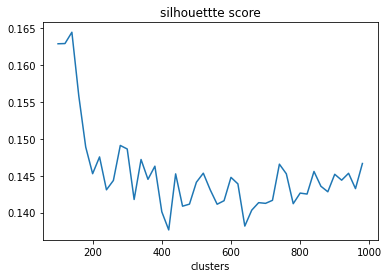

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(clusters, sil_scores)
plt.xlabel("clusters")
plt.title("silhouettte score")

Text(0.5, 1.0, 'calinski_harabasz score')

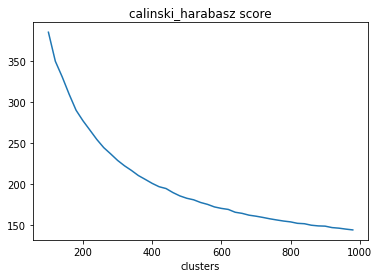

In [49]:
plt.plot(clusters, cali_scores)
plt.xlabel("clusters")
plt.title("calinski_harabasz score")

Text(0.5, 1.0, 'davies_bouldin score')

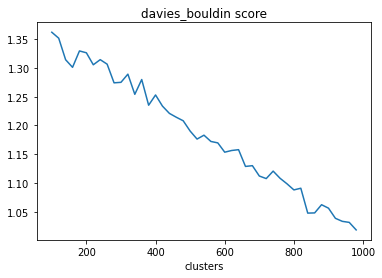

In [50]:
plt.plot(clusters, davies_scores)
plt.xlabel("clusters")
plt.title("davies_bouldin score")

Here we use `cluster=200` for the following analysis

In [51]:
model_200 = models[(200 - 100) // 20]
print(len(model_200.cluster_centers_))

200


In [52]:
std_t = std[:split_index]
mean_t = mean[:split_index]

In [53]:
origin_t = (pca.inverse_transform(train_s)) * std_t + mean_t
origin_t.shape

(7160, 17)

In [54]:
len(model.labels_)

7160

In [57]:
labels = range(200)

balance_means = []
balance_std = []

for label in labels:
    subset = origin_t[model_200.labels_ == label]
    balance_means.append(np.mean(subset[:, 0]))
    balance_std.append(np.std(subset[:, 0]))
    print("{}--".format(label), end='')

0--1--2--3--4--5--6--7--8--9--10--11--12--13--14--15--16--17--18--19--20--21--22--23--24--25--26--27--28--29--30--31--32--33--34--35--36--37--38--39--40--41--42--43--44--45--46--47--48--49--50--51--52--53--54--55--56--57--58--59--60--61--62--63--64--65--66--67--68--69--70--71--72--73--74--75--76--77--78--79--80--81--82--83--84--85--86--87--88--89--90--91--92--93--94--95--96--97--98--99--100--101--102--103--104--105--106--107--108--109--110--111--112--113--114--115--116--117--118--119--120--121--122--123--124--125--126--127--128--129--130--131--132--133--134--135--136--137--138--139--140--141--142--143--144--145--146--147--148--149--150--151--152--153--154--155--156--157--158--159--160--161--162--163--164--165--166--167--168--169--170--171--172--173--174--175--176--177--178--179--180--181--182--183--184--185--186--187--188--189--190--191--192--193--194--195--196--197--198--199--

In [63]:
array_means = np.array(balance_means)
array_stds = np.array(balance_std)

In [71]:
array_means[:10]

array([1413.904  ,  521.87256, 3049.156  , 6805.7163 ,  287.2971 ,
        115.51619, 3480.177  , 3249.7886 ,   86.3283 , 6183.5874 ],
      dtype=float32)

In [70]:
array_stds[:10]

array([ 708.1161  ,  588.34247 , 1053.0569  , 2742.1355  ,  240.8296  ,
        170.0711  , 1250.2478  ,    0.      ,  119.185356, 1262.457   ],
      dtype=float32)

In [74]:
((array_stds / array_means) * 100)[:20]

array([ 50.082333, 112.73681 ,  34.536015,  40.291653,  83.82598 ,
       147.22707 ,  35.924835,   0.      , 138.06058 ,  20.416256,
        76.50524 , 110.40548 ,  23.781988,  57.63734 ,  27.212854,
       237.86264 ,  16.843086,  41.3745  ,  71.92412 , 321.4646  ],
      dtype=float32)

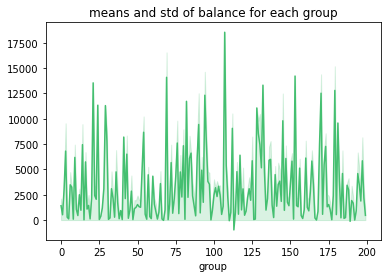

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm


color = cm.viridis(0.7)
f, ax = plt.subplots(1,1)
ax.plot(labels, array_means, color=color)
plt.xlabel("group")
plt.title("means and std of balance for each group")
r1 = array_means + array_stds
r2 = array_stds - array_stds
ax.fill_between(labels, list(r1), list(r2), color=color, alpha=0.2)